<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [ ]:
# loading the data: Wholesale customers data
# loading the data set
wholesale =pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week5\Day2\lab-unsupervised-learning-en\data\Wholesale customers data.csv")

In [ ]:
# Exploring the data set by looking at the first 5 rows. 
# checking the shape, types and missing data using .info

display(wholesale.head()) # displaying the first 5 rows of the set
display(wholesale.info())


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

In [4]:
wholesale["Channel"].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [6]:
wholesale["Region"].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [ ]:
# all columns are of data type int.
# we can keep the type as is. the channel columns is divided to 2 inputs. 1 is for hospitality and 2 is for retail. 
# region is split into 3 inputs. 1, 2, and 3 to specify 3 different regions in which the annual sales were recorded
# the other columns presetn the annual spending of each given product.

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
# no types need to be changed as mentioned before
# no data is missing according to the info disolayed above
# next a heat map will be plotted to check if there is colinearity between the different variables.
# a boxplot will be plotted to check for outliers


<Axes: >

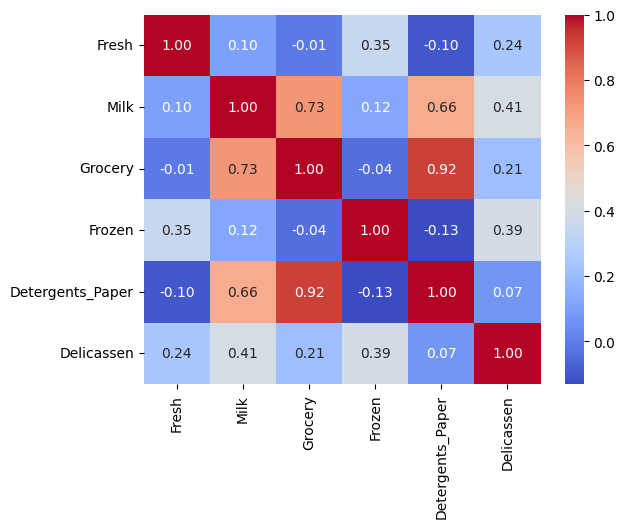

In [11]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
wholesale_corr = wholesale[cols].corr()
sns.heatmap(wholesale_corr, annot=True, cmap='coolwarm', fmt=".2f")


In [ ]:
# a big correlation can be seen for detergents paper and groceries. 
# this can be explained by people buying groceries and detergent papers when shopping. 

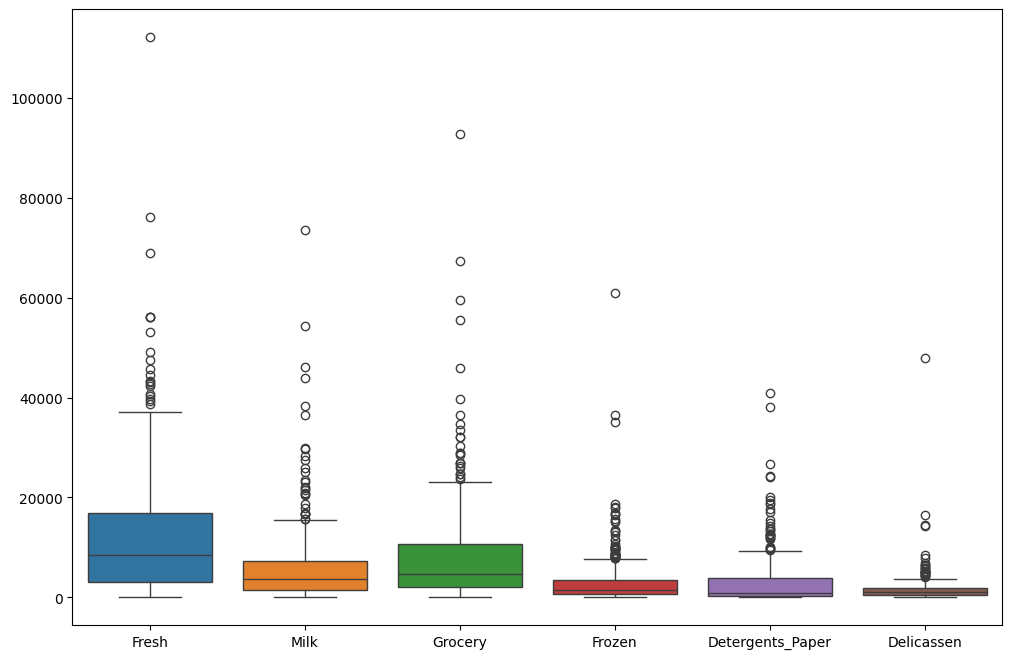

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8)) 
sns.boxplot(data=wholesale[cols])
plt.show()
 


In [ ]:
# the box plot shows that most people are low spenders, with very high spenders being the outliers in each category.
# the box plot also hints towards a right skew, since we can see that most of our data is on the lower end of the expenditure range. 
# meaning that we will have a longer tail to the right and thus a positive skew. 
# to make sure we will print out the describe method

In [41]:
wholesale_clean = wholesale[cols]
wholesale[cols].describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# as expected the q3 is actually closer to the minimum value than it is to the maximum value, proving what we deduced before.
# a histogram should confirm our analysis

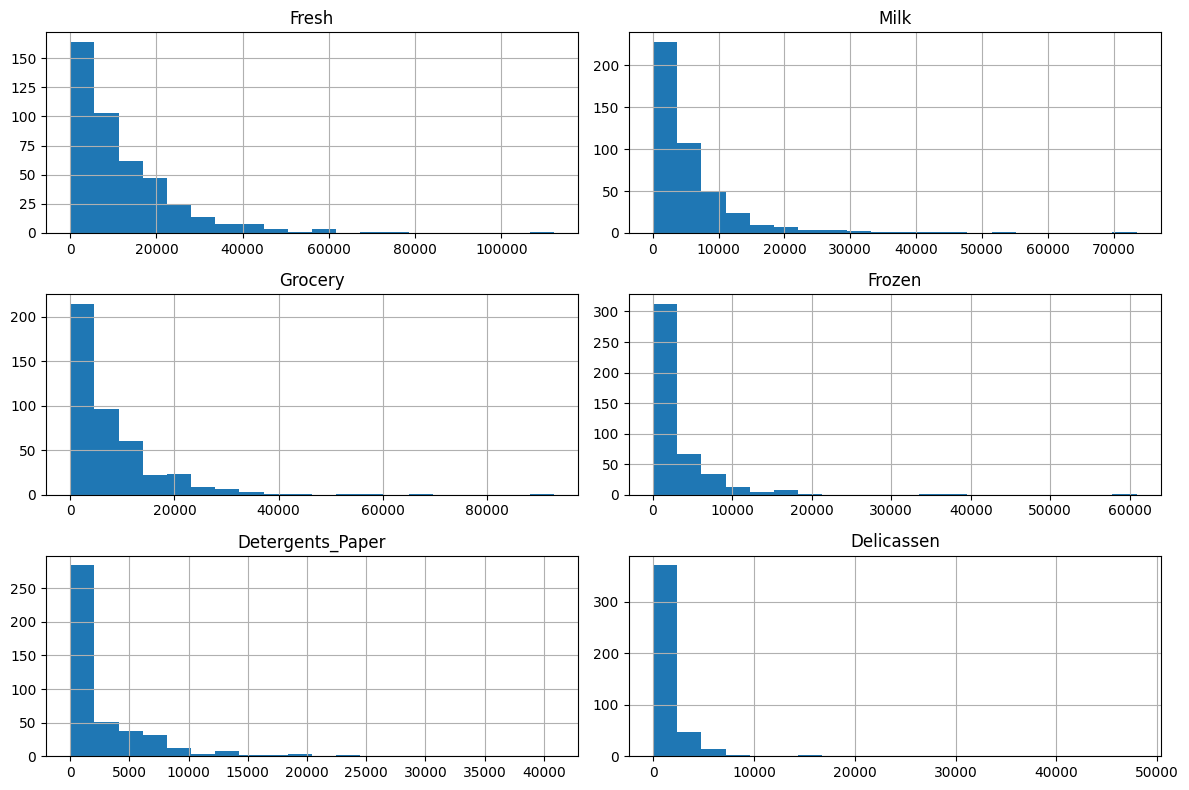

In [17]:
wholesale[cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()


In [18]:
# checking the pareto
# first calculate the total spending for each customer across all products.

total_per_customer = wholesale[cols].sum(axis=1)


In [19]:
# now sort the customers according to total spending

sorted_total = total_per_customer.sort_values(ascending=False)

In [20]:
# to get the proportion of total sales according to the spenders. calculate the cumalative spending of the sorted total.
# this way we can have a cutoff at the 80% of total spending, and check to what proportion of total customers does it relate to

cumalitive_spending = sorted_total.cumsum()/sorted_total.sum() # dividing by the total amount of sales to get the proportion

In [22]:
# define the pareto cutoff at 80%

pareto_cutoff = cumalitive_spending[cumalitive_spending<=0.8]

# use count to add the number of customers responsible for 80% of the spending

pareto_cutoff = pareto_cutoff.count()

# divide by total number of customer to get the proportion of customers responsible tfor 80% of spending

pareto_cutoff = pareto_cutoff/len(cumalitive_spending)

print(pareto_cutoff)

0.5704545454545454


In [ ]:
# the pareto case is not true for our case. as 57% of customers are resposible for 80% of expenditure

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here
# we don't need to do anything as there are no missing data, and we want to keep all columns. all types are correct and dont need any change

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [24]:
# Your import here:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

customer_scale = scaler.fit_transform(wholesale[cols])

customer_scale = pd.DataFrame(customer_scale, columns= cols)
# Your code here:

customer_scale.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Your code here:
# first we do the elbow step to dinf the best model (optimal number of clusters)

for model 2 silhouette score is:  0.3998278091730005
for model 3 silhouette score is:  0.4582633767207058
for model 4 silhouette score is:  0.34939129340421093
for model 5 silhouette score is:  0.36890127429678043
for model 6 silhouette score is:  0.2762464573058837
for model 7 silhouette score is:  0.276678268663421
for model 8 silhouette score is:  0.32366546538940916
for model 9 silhouette score is:  0.29453704649783113
for model 10 silhouette score is:  0.22876866444760022
for model 11 silhouette score is:  0.29510219162877355


<function matplotlib.pyplot.show(close=None, block=None)>

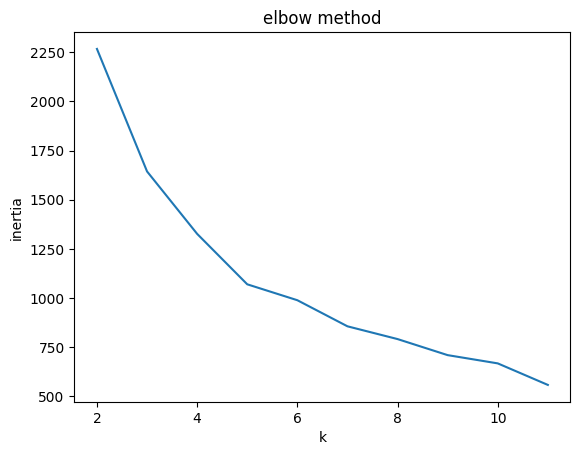

In [37]:
inertia = []

k =range(2,12)

for x in k:
    model=KMeans(n_clusters = x, random_state=42)
    model.fit(customer_scale)
    inertia.append(model.inertia_)
    s_score = silhouette_score(customer_scale,model.labels_)
    print("for model",x, "silhouette score is: ", s_score)
   # display(model.labels_)


plt.plot(k,inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("elbow method")
plt.show

In [ ]:
# the choice should be k = 5 however, we will continue with only 2 clusters as mentioned below

### Looking to the elbow we can choose 2 like the correct number of clusters

In [45]:
kmeans_2 = KMeans(n_clusters=2).fit(customer_scale)

labels = kmeans_2.predict(customer_scale)

clusters = kmeans_2.labels_.tolist()


clusters == labels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [42]:
wholesale_clean['Label'] = clusters

C:\Users\traik\AppData\Local\Temp\ipykernel_20488\3983991612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_clean['Label'] = clusters


Count the values in `labels`.

In [49]:
# Your code here:
labels  = pd.DataFrame(labels)
labels.value_counts()

0
0    404
1     36
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [61]:
from sklearn.cluster import DBSCAN 

# Your code here

model_db = DBSCAN(eps = 0.5,min_samples=4)

model_db.fit(customer_scale)

wholesale_clean["labels_dbscan"] = model_db.labels_


Count the values in `labels_DBSCAN`.

In [62]:
# Your code here

wholesale_clean["labels_dbscan"].value_counts()


labels_dbscan
 0    274
-1    160
 1      6
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [55]:
def plot_clusters(data, x, y, hue, title=None):
  
    
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette='tab10')
    plt.title(title if title else f'{x} vs {y}')
    plt.tight_layout()
    plt.show()


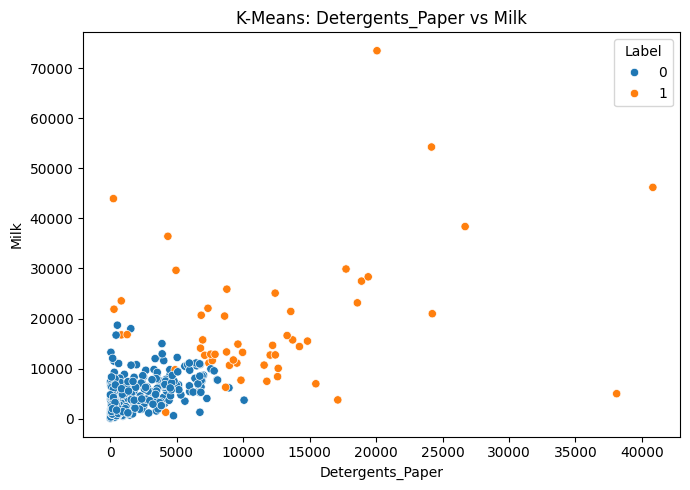

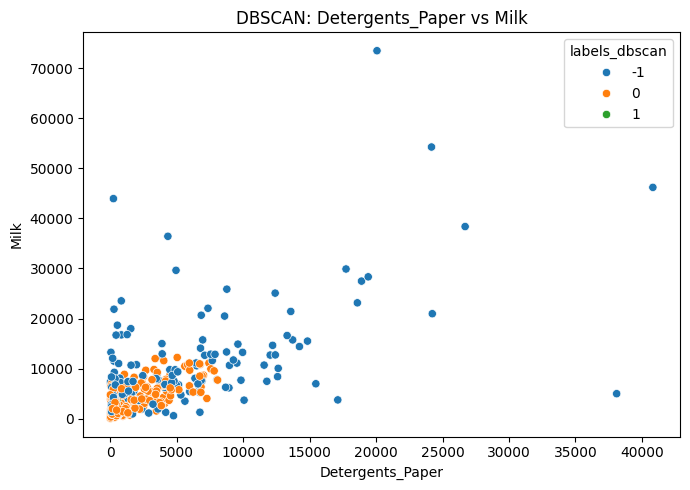

In [63]:
# Your code here:

plot_clusters(wholesale_clean, 'Detergents_Paper', 'Milk', 'Label', 'K-Means: Detergents_Paper vs Milk')


plot_clusters(wholesale_clean, 'Detergents_Paper', 'Milk', 'labels_dbscan', 'DBSCAN: Detergents_Paper vs Milk')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

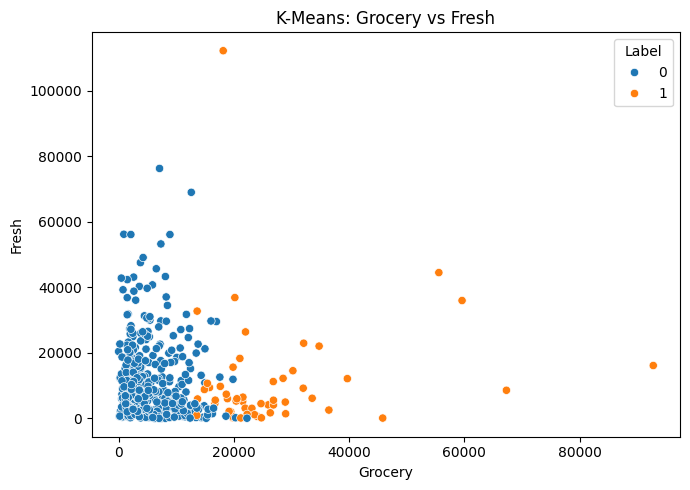

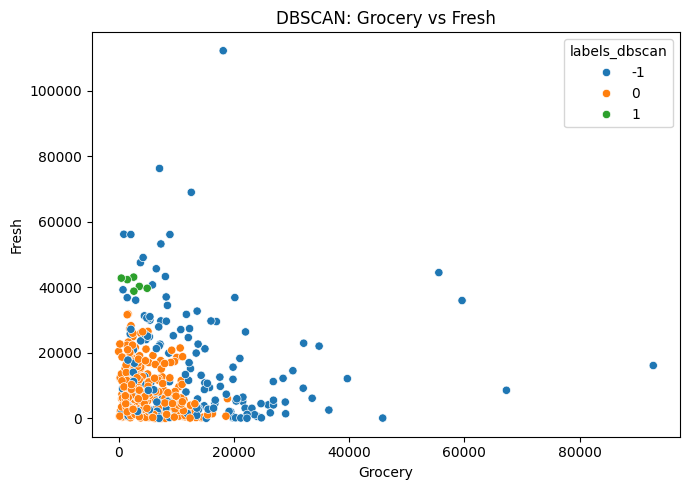

In [65]:
# Your code here:
# Grocery vs Fresh with K-Means clusters
plot_clusters(
    wholesale_clean,
    x='Grocery',
    y='Fresh',
    hue='Label',
    title='K-Means: Grocery vs Fresh'
)

# Grocery vs Fresh with DBSCAN clusters
plot_clusters(
    wholesale_clean,
    x='Grocery',
    y='Fresh',
    hue='labels_dbscan',
    title='DBSCAN: Grocery vs Fresh'
)


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

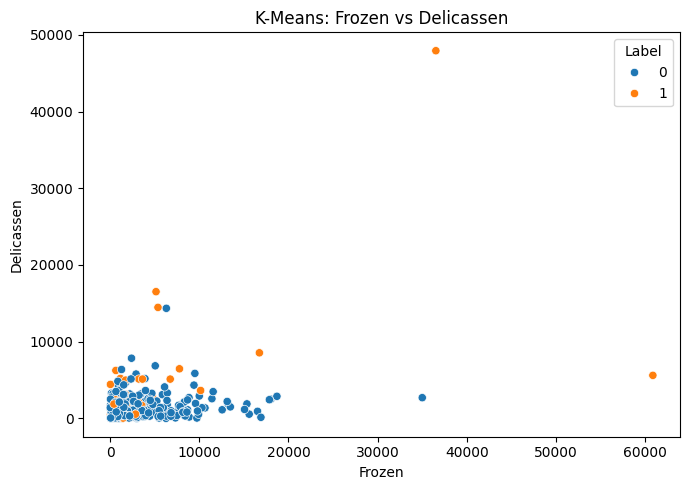

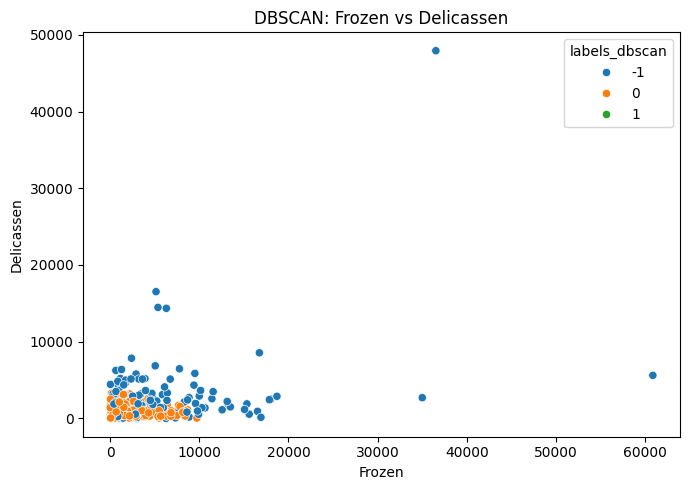

In [67]:
# Your code here:

# Frozen vs Delicassen with K-Means clusters
plot_clusters(
    wholesale_clean,
    x='Frozen',
    y='Delicassen',
    hue='Label',
    title='K-Means: Frozen vs Delicassen'
)

# Frozen vs Delicassen with DBSCAN clusters
plot_clusters(
    wholesale_clean,
    x='Frozen',
    y='Delicassen',
    hue='labels_dbscan',
    title='DBSCAN: Frozen vs Delicassen'
)


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 